# Basic EDA for flats

For this dataset, we're going to perform a really basic data analysis to observe...

First of all, we will load the csv file created on the before notebook (`flat_rent.csv`).

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = Path('../data/processed')

df = pd.read_csv(DATA_PATH / 'flat_rent.csv', index_col=0)

df.head()

,propertyCode,thumbnail,numPhotos,floor,price,propertyType,operation,size,exterior,rooms,...,topNewDevelopment,detailedType_typology,suggestedTexts_subtitle,suggestedTexts_title,parkingSpace_hasParkingSpace,parkingSpace_isParkingSpaceIncludedInPrice,detailedType_subTypology,parkingSpace_parkingSpacePrice,newDevelopmentFinished,spain_state
0,88707408,https://img3.idealista.com/blur/WEB_LISTING/0/...,18,3,1050.0,flat,rent,50.0,True,1,...,False,flat,"Sants, Barcelona","Piso en Calle de Sants, 208",False,False,unknown,0.0,NaN,Barna
1,90050445,https://img3.idealista.com/blur/WEB_LISTING/0/...,13,5,3000.0,flat,rent,170.0,True,5,...,False,flat,"Pedralbes, Barcelona",Piso en Avenida Diagonal,True,True,unknown,0.0,NaN,Barna
2,89790054,https://img3.idealista.com/blur/WEB_LISTING/0/...,17,4,1050.0,flat,rent,75.0,True,2,...,False,flat,"La Maternitat i Sant Ramon, Barcelona",Piso en Calle del Comandant Benítez,False,False,unknown,0.0,NaN,Barna
3,89813394,https://img3.idealista.com/blur/WEB_LISTING/0/...,16,3,780.0,studio,rent,36.0,True,0,...,False,flat,"La Maternitat i Sant Ramon, Barcelona",Estudio,False,False,studio,0.0,NaN,Barna
4,90050238,https://img3.idealista.com/blur/WEB_LISTING/0/...,14,1,725.0,flat,rent,65.0,True,2,...,False,flat,"Sant Ildefons, Cornellà de Llobregat",Piso en boix,False,False,unknown,0.0,NaN,Barna


## Price by province

If we take a look on this current dataset, each flat corresponds a unique city. The idea is calculate the average by city in order to get the average price for renting a flat. For instance, actually the flats in Barcelona are more expensive than Lleida.

In [47]:
data = df.groupby('spain_state')['price'].mean()
data.index

Index(['Barna', 'Girona', 'Lleida', 'Madrid', 'Malaga', 'Mallorca',
       'Tarragona', 'Valencia', 'Zaragoza'],
      dtype='object', name='spain_state')

Text(0, 0.5, 'Price')

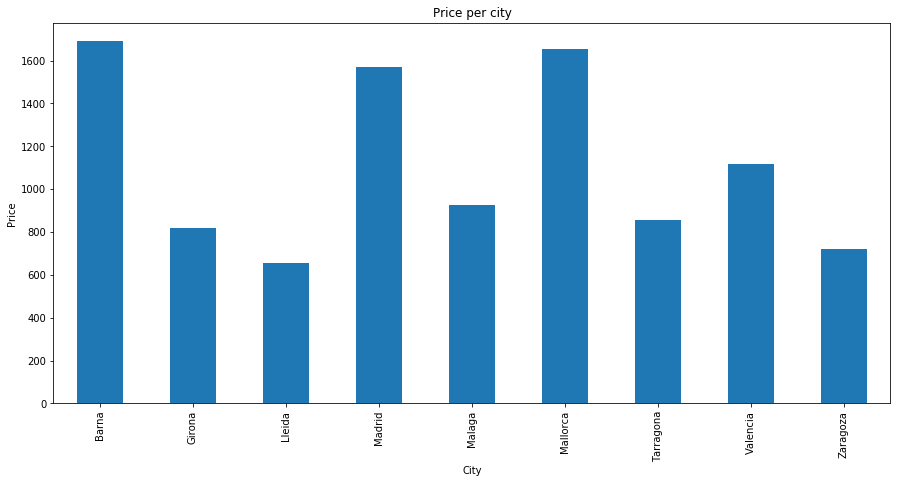

In [42]:
fig,ax = plt.subplots(figsize=(15,7))
plt.title('Price per city')
data.plot.bar(ax=ax)
plt.xlabel('City')
plt.ylabel('Price')

## Average price by type of property

As we know the propierties on sale that appear on idealista can be too different. For instance, on the next part we can see the different types of propierties that exists on this dataset. Each one could be very different than other and this also affect on your price.

In [48]:
data = df.groupby('propertyType')['price'].mean()
data.index

Index(['chalet', 'countryHouse', 'duplex', 'flat', 'penthouse', 'studio'], dtype='object', name='propertyType')

Text(0, 0.5, 'Price')

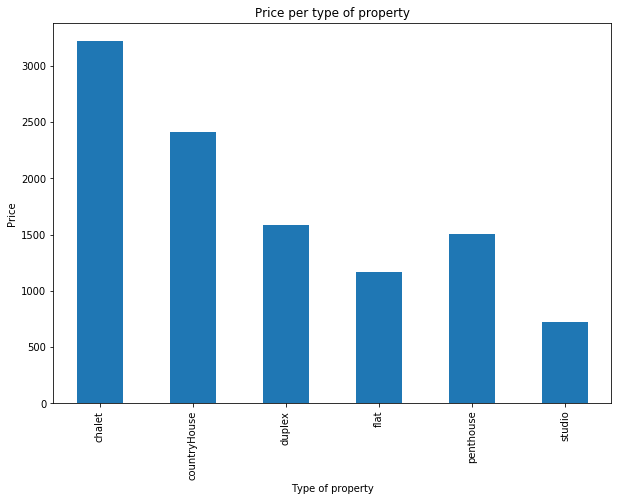

In [50]:
fig,ax = plt.subplots(figsize=(10,7))
plt.title('Price per type of property')
data.plot.bar(ax=ax)
plt.xlabel('Type of property')
plt.ylabel('Price')

## Rents in numbers

On this dataset, each line corresponds an offer that one property do in order to rent your property to other people who find a rent flat or whatever. If we take into that our dataset is composed by offers on the most important cities in our country, we can see what type of flat is the most sold.

In [55]:
data = df.groupby('propertyType')['price'].count()
data

propertyType
chalet           404
countryHouse      11
duplex           236
flat            8402
penthouse        587
studio           334
Name: price, dtype: int64

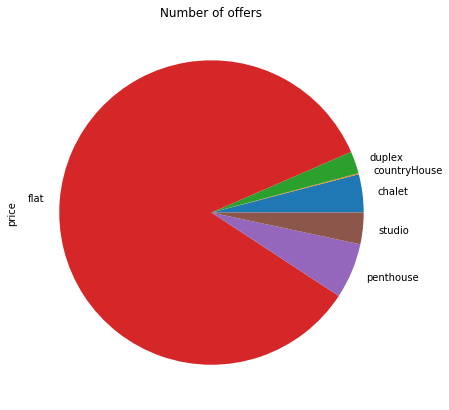

In [54]:
fig,ax = plt.subplots(figsize=(10,7))
plt.title('Number of offers')
data.plot.pie(ax=ax)